<a href="https://colab.research.google.com/github/thisaraniNJ/Flight_Price_Prediction/blob/main/Flight_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv('/content/drive/MyDrive/My ML Projects/Airline price prediction/Clean_Dataset.csv')

In [121]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [123]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [124]:
df.duplicated().sum()

0

In [125]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [126]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [127]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [128]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [129]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [130]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [131]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [132]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [133]:
df['duration'].min()

0.83

In [134]:
df['duration'].max()

49.83

In [135]:
df['duration'].median()

11.25

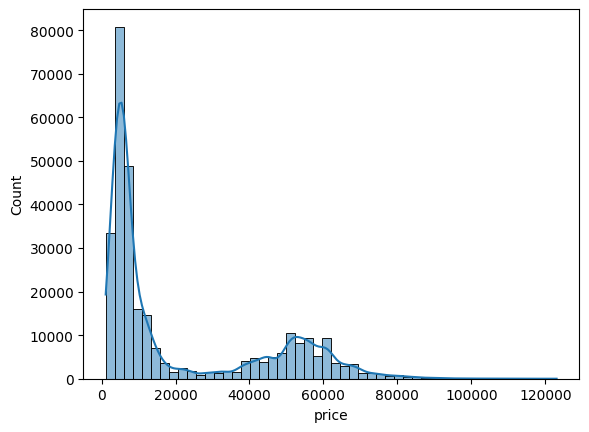

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['price'], bins=50, kde=True)
plt.show()

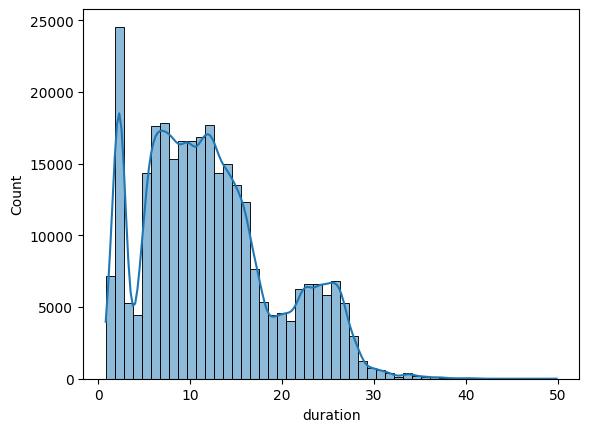

In [137]:
sns.histplot(df['duration'], bins=50, kde=True)
plt.show()

<Axes: xlabel='days_left', ylabel='price'>

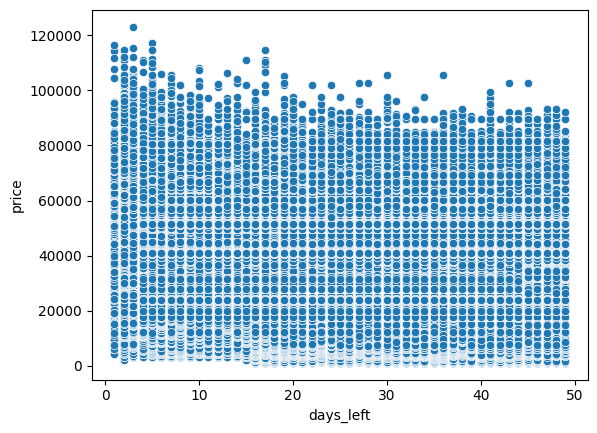

In [138]:
sns.scatterplot(x=df['days_left'], y=df['price'])

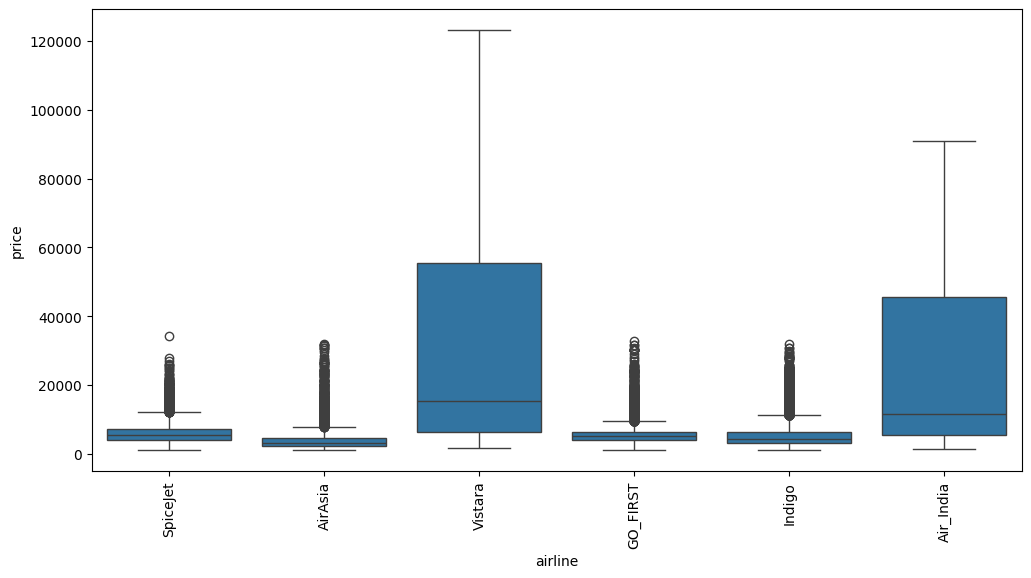

In [139]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='class', ylabel='price'>

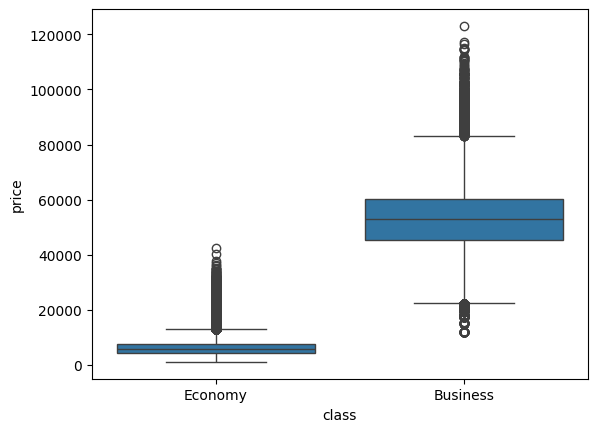

In [140]:
sns.boxplot(x='class', y='price', data=df)

<Axes: xlabel='stops', ylabel='price'>

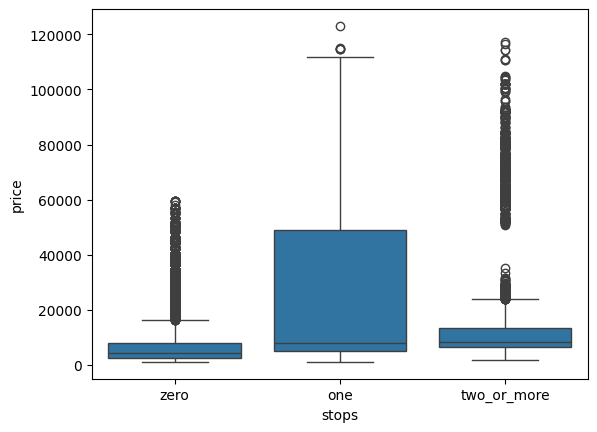

In [141]:
sns.boxplot(x='stops', y='price', data=df)

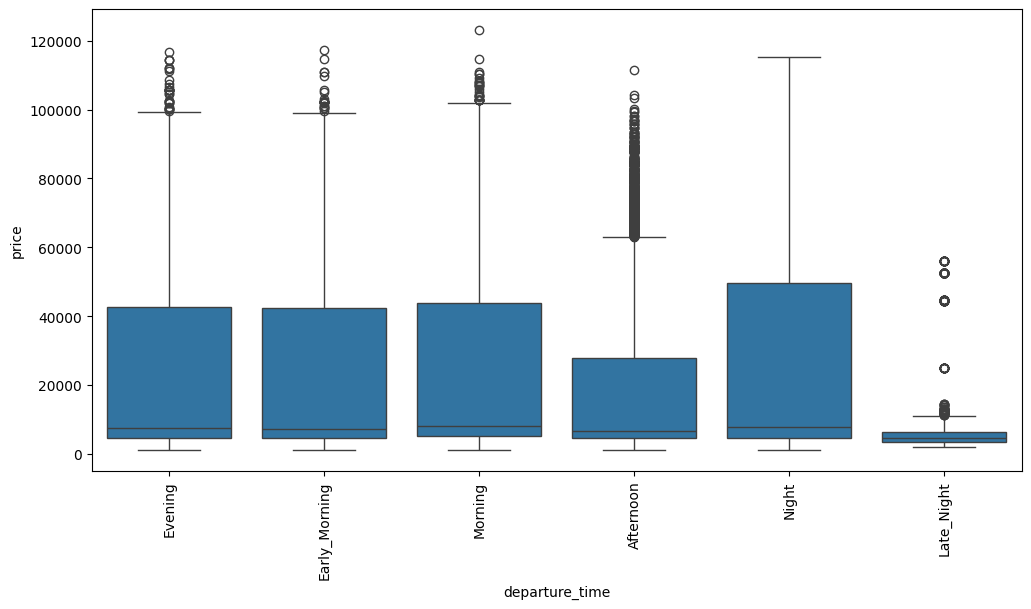

In [142]:
plt.figure(figsize=(12,6))
sns.boxplot(x='departure_time', y='price', data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='arrival_time', ylabel='price'>

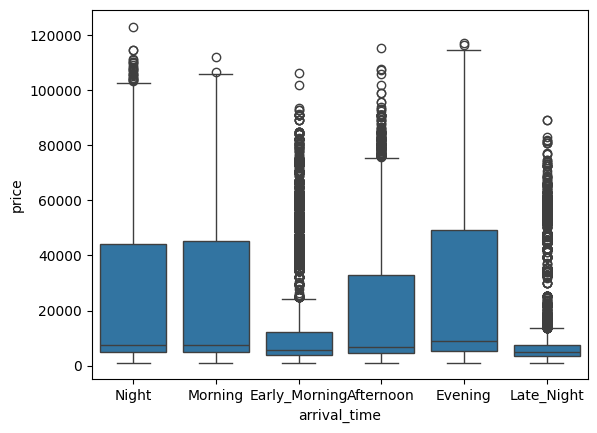

In [143]:
sns.boxplot(x='arrival_time', y='price', data=df)

<Axes: xlabel='days_left', ylabel='price'>

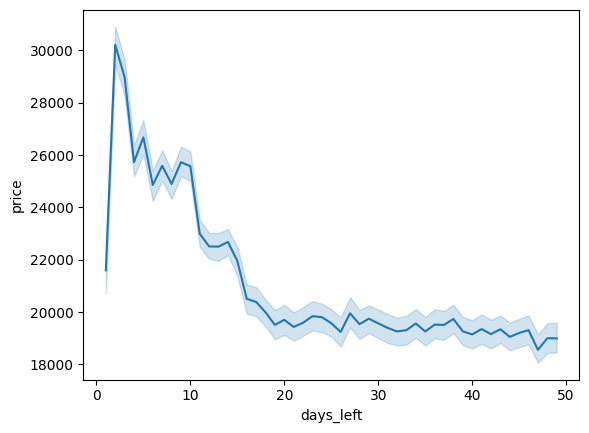

In [144]:
sns.lineplot(x='days_left', y='price', data=df)

<Axes: xlabel='destination_city'>

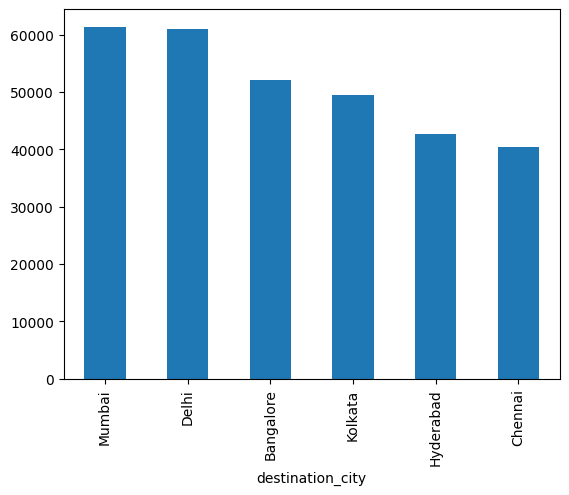

In [145]:
df['source_city'].value_counts().plot(kind='bar')
df['destination_city'].value_counts().plot(kind='bar')

In [146]:
df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)

source_city  destination_city
Chennai      Bangalore           25081.850454
Kolkata      Chennai             23660.361040
Bangalore    Kolkata             23500.061229
             Chennai             23321.850078
Mumbai       Bangalore           23147.873807
Bangalore    Mumbai              23128.618672
Mumbai       Chennai             22781.899112
Chennai      Mumbai              22765.849647
Kolkata      Bangalore           22744.808428
Chennai      Kolkata             22669.932407
Mumbai       Kolkata             22379.146723
Kolkata      Mumbai              22078.883579
Hyderabad    Chennai             21848.065989
Chennai      Hyderabad           21591.345404
Kolkata      Hyderabad           21500.011397
Hyderabad    Bangalore           21347.177998
Bangalore    Hyderabad           21226.121192
Mumbai       Hyderabad           21004.046705
Hyderabad    Kolkata             20823.893201
Delhi        Kolkata             20566.409418
Hyderabad    Mumbai              20080.865759
Kolkata      Delhi               19422.354559
Delhi        Chennai             19369.881354
             Mumbai              19355.829812
Chennai      Delhi               18981.863948
Mumbai       Delhi               18725.320008
Delhi        Bangalore           17880.216315
Bangalore    Delhi               17723.313972
Delhi        Hyderabad           17347.288379
Hyderabad    Delhi               17243.945685
Name: price, dtype: float64

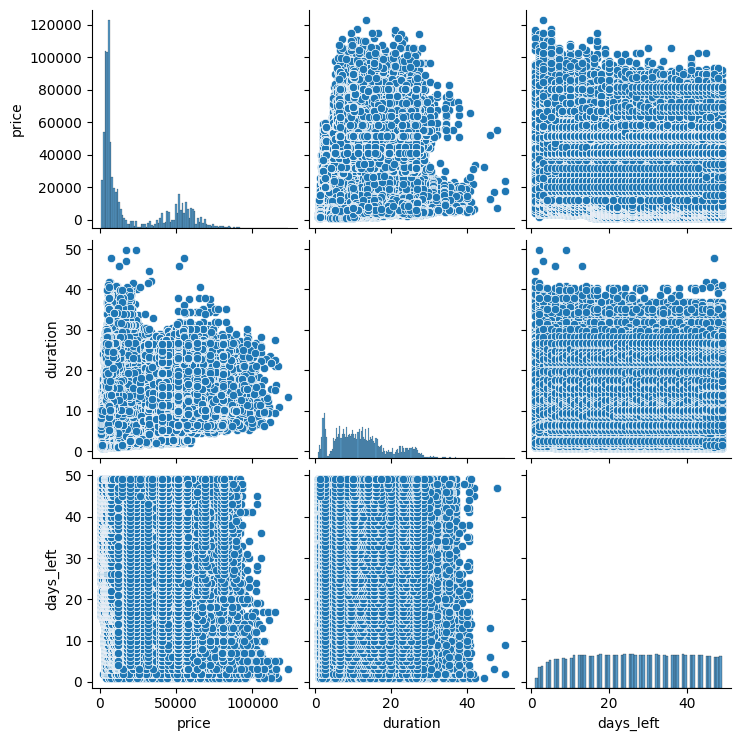

In [147]:
sns.pairplot(df[['price', 'duration', 'days_left']])

Preprocessing

In [163]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [164]:
df.stops = pd.factorize(df.stops)[0]

In [165]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [166]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline',axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city')).drop('source_city',axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city')).drop('destination_city',axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time')).drop('departure_time',axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time')).drop('arrival_time',axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300151,1,1,10.00,49,81585,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Training Regression model

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X,y = df.drop('price', axis=1), df.price

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [173]:
reg.score(X_test, y_test)

0.9850278899449125

In [174]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE', mean_squared_error(y_test, y_pred))

R2: 0.9850278899449125
MAE: 1075.2901176226278
RMSE: 2778.1031894657694
MSE 7717857.33131988


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

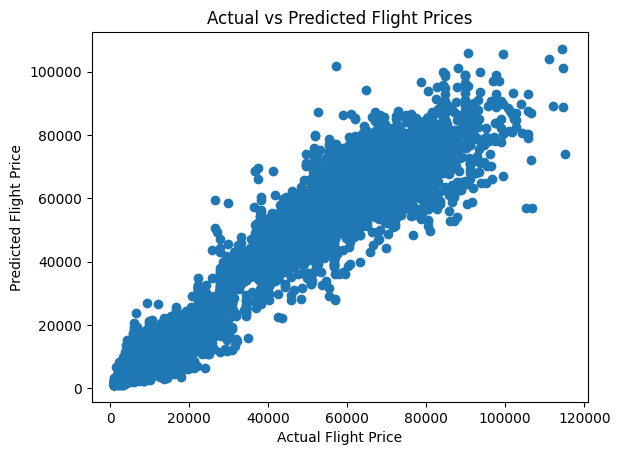

In [176]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')

In [177]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [179]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
stored_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
stored_importances

[('class', 0.8798758191482237),
 ('duration', 0.05769960102370707),
 ('days_left', 0.01850044086537673),
 ('airline_Air_India', 0.0050454338746946615),
 ('airline_Vistara', 0.0048703634684270775),
 ('source_city_Delhi', 0.003819889941838601),
 ('destination_city_Delhi', 0.0034861037382631823),
 ('source_city_Mumbai', 0.002262815582171347),
 ('stops', 0.0019042344259123157),
 ('destination_city_Mumbai', 0.0018927549303181547),
 ('destination_city_Kolkata', 0.0017671862237412768),
 ('source_city_Kolkata', 0.0017129261955842524),
 ('arrival_time_Evening', 0.0014872807664773535),
 ('destination_city_Hyderabad', 0.001456515825693552),
 ('destination_city_Bangalore', 0.00132892248090973),
 ('source_city_Hyderabad', 0.0012345047233581247),
 ('arrival_time_Night', 0.0011479190094598848),
 ('source_city_Bangalore', 0.0011082613472976548),
 ('departure_time_Evening', 0.001089939814711835),
 ('arrival_time_Afternoon', 0.000973337829959955),
 ('source_city_Chennai', 0.0008689156535316905),
 ('depa

In [180]:
df.days_left.describe()

,days_left
count,300153.000000
mean,26.004751
std,13.561004
min,1.000000
25%,15.000000
50%,26.000000
75%,38.000000
max,49.000000


<BarContainer object of 10 artists>

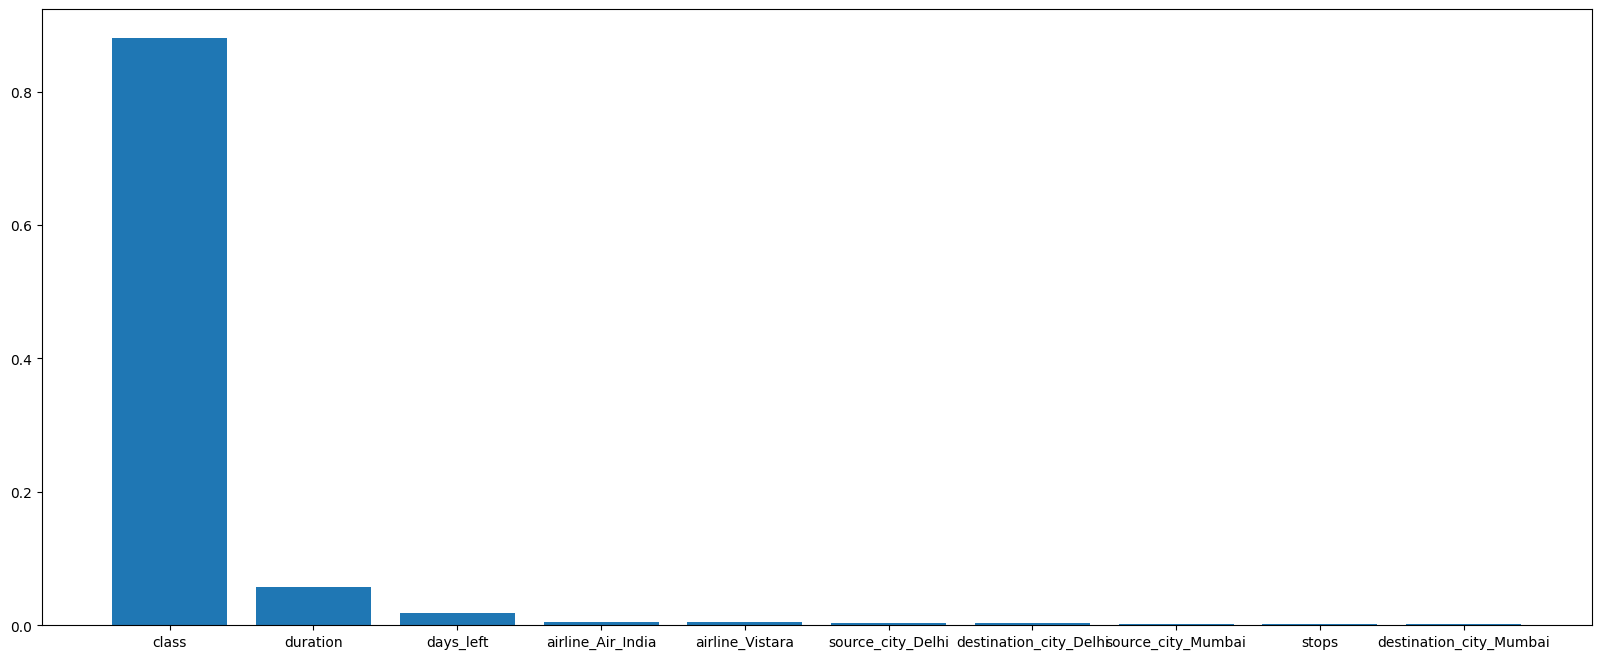

In [185]:
plt.figure(figsize=(20,8))
plt.bar([x[0] for x in stored_importances[:10]], [x[1] for x in stored_importances[:10]])

Hyperparamenter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
reg = RandomForestRegressor(n_jobs=-1)
param_grid ={
    'n_estimators': [100,200,300],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt', 'auto']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist ={
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10,20,30,40,50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'sqrt', 'auto']
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10,n_jobs=-1)
random_search.fit(X_train, y_train)

best_reg = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [187]:
best_reg.score(X_test, y_test)

0.9859464033842426

In [188]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_reg.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('MSE', mean_squared_error(y_test, y_pred))

R2: 0.9859464033842426
MAE: 1091.4393957231243
RMSE: 2691.5385814270717
MSE 7244379.935310454


Text(0.5, 1.0, 'Actual vs Predicted Flight Prices')

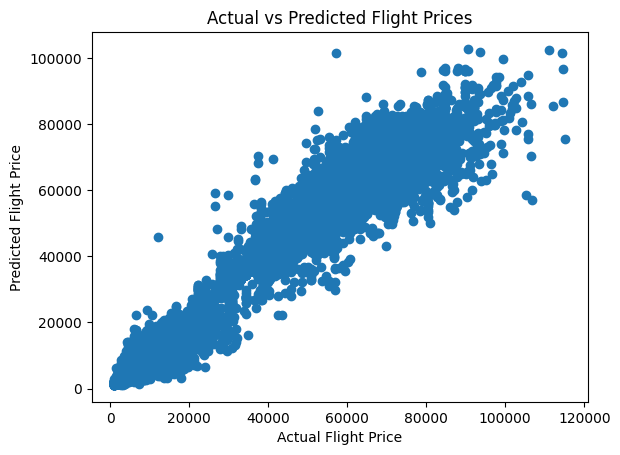

In [189]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Actual vs Predicted Flight Prices')